In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as s
import seaborn as sns
df = pd.read_csv('../data/raw/top250-00-19.csv')

## About the Data

1. Name / Title: Top 250 Football transfers from 2000 to 2018
2. Link to Data: https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018
3. Source / Origin: 
	* Author or Creator: Vardan
	* Publication Date: 3 Years Ago (August 2018)
	* Publisher: Kaggle
	* Version or Data Accessed: Version 1
4. License: Unspecified License
5. Can You Use this Data Set for Your Intended Use Case? Yes, lot's of interesting data can be seen here!

## Format and Samples

In [119]:
df.sample(5)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
3593,Tin Jedvaj,Centre-Back,19,AS Roma,Serie A,Bay. Leverkusen,1.Bundesliga,2014-2015,6500000.0,7000000
3955,Gaël Kakuta,Left Winger,24,Chelsea,Premier League,Sevilla FC,LaLiga,2015-2016,3500000.0,6000000
3139,Junior Fernandes,Left Winger,24,U. de Chile,Primera División,Bay. Leverkusen,1.Bundesliga,2012-2013,800000.0,4700000
2775,Marco Borriello,Centre-Forward,29,AC Milan,Serie A,AS Roma,Serie A,2011-2012,13000000.0,10000000
2397,Maicosuel,Left Winger,23,Desp. Brasil,Brazil,TSG Hoffenheim,1.Bundesliga,2009-2010,2000000.0,4500000


### Overview

Format: CSV File

Size: 531 Kbs

Number of Records: 4700 Rows

### Fields or Column Headers

In [120]:
df.dtypes

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
dtype: object

### Information by League

In [121]:
for i in range(5):
    league_mean = df.groupby(by=['League_to']).mean()['Transfer_fee'].sort_values(ascending=False)
    print('#' + str(i+1),league_mean.index[i],'$', league_mean.values[i])

#1 LaLiga $ 12724495.238095239
#2 Premier League $ 11700159.23566879
#3 Segunda División - Segunda Fase $ 11000000.0
#4 Serie A $ 10196508.795669824
#5 Super League $ 9756393.44262295


* Surprisingly, the 2nd division of Spanish Football is the 3rd largest spender of all the leagues.
* Chinese Super League is also up there among the leagues that spent the most money from 2000-2018, even though the average person couldn't tell you a team from that league

### Correlations? (Age or Team_from to Transfer_fee?)

In [122]:
df.corr()

,Age,Market_value,Transfer_fee
Age,1.000000,0.142739,-0.001803
Market_value,0.142739,1.000000,0.830573
Transfer_fee,-0.001803,0.830573,1.000000


There is obviously a great correlation between Transfer Fees and Market Values, but I'd expect a greater correlation between Age and Market Value, with there being 0 correlation. This can be seen below, the scatterplot is unimodal.

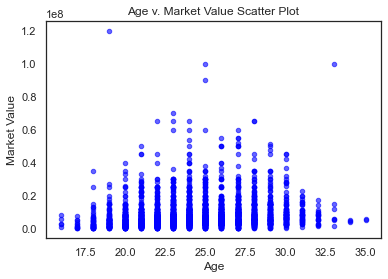

Age Median: 24.0


In [123]:
df.plot(kind='scatter', x='Age', y='Market_value',color = 'blue', alpha=.6)
plt.xlabel('Age')              
plt.ylabel('Market Value')
plt.title('Age v. Market Value Scatter Plot')  
plt.show()
print('Age Median:',df['Age'].median())

Clearly a **unimodal** distribution around the median of 24. 

There are **4 particular outliers** I'd like to look at and I am pretty sure who these players are. Let's find these outliers by sorting the Market values 

In [124]:
df.sort_values(by='Market_value', ascending=False).head(4)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000


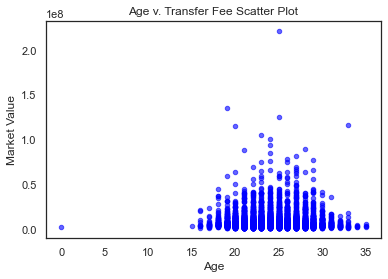

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000


In [125]:
df.plot(kind='scatter', x='Age', y='Transfer_fee',color = 'blue', alpha=.6)
plt.xlabel('Age')              
plt.ylabel('Market Value')
plt.title('Age v. Transfer Fee Scatter Plot')  
plt.show()
df.sort_values(by='Transfer_fee', ascending=False).head(4)

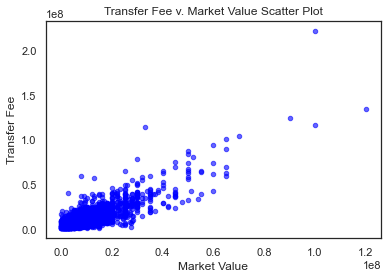

In [126]:
df.plot(kind='scatter', x='Market_value', y='Transfer_fee',color = 'blue', alpha=.6)
plt.xlabel('Market Value')              
plt.ylabel('Transfer Fee')
plt.title('Transfer Fee v. Market Value Scatter Plot')  
plt.show()

### What trades were amazing deals vs what trades were horrible deals?
* I'll be creating a separate column where the Transfer fee will be divided by the players Market Value and seeing which players sold for higher than their worth and which one were outright bad deals.

In [127]:
df['Tranfer_value_ratio'] = df['Transfer_fee']/df['Market_value']
df.sort_values(by='Tranfer_value_ratio', ascending=False)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Tranfer_value_ratio
4026,Yuhao Zhao,Defensive Midfield,23,ZJ Greentown,League One,HB CFFC,Super League,2016-2017,100000.0,17800000,178.0
2347,Kyle Walker,Right-Back,19,Sheffield Utd.,Championship,Spurs,Premier League,2009-2010,50000.0,5900000,118.0
3840,Lu Zhang,Goalkeeper,28,Liaoning FC,Super League,TJ Quanjian,League One,2015-2016,100000.0,9800000,98.0
3558,Wallace,Centre-Back,19,Cruzeiro,Série A,Braga,Liga NOS,2014-2015,100000.0,9500000,95.0
2283,Fabian Delph,Central Midfield,19,Leeds,League One,Aston Villa,Premier League,2009-2010,100000.0,9500000,95.0
...,...,...,...,...,...,...,...,...,...,...,...
4355,Douglas Luiz,Central Midfield,19,Vasco da Gama,Série A,Man City,Premier League,2017-2018,NaN,12000000,NaN
4427,Jadon Sancho,Left Winger,17,Man City U18,U18 Premier League,Bor. Dortmund,1.Bundesliga,2017-2018,NaN,7840000,NaN
4618,Davide Bettella,Centre-Back,18,Inter,Serie A,Atalanta,Serie A,2018-2019,NaN,7000000,NaN
4648,William Bianda,Centre-Back,18,Lens,Ligue 2,AS Roma,Serie A,2018-2019,NaN,6000000,NaN


Take into account that many players were transferred from the youth programs of different teams and therefore no monetary value was put on them, making these NaN. One player clearly seen in the tail is Jaden Sancho, arguably one of the best players from the new generation of footballers. 

* In the following analysis, country names appear, and the dataset website makes no mention what these mean since National teams cannot trade players for money :/

In [128]:
value_ratios = df.loc[df['Tranfer_value_ratio'].notna()].groupby('League_to').mean()['Tranfer_value_ratio'].sort_values(ascending=False)
value_ratios.head().append(value_ratios.tail())

League_to
League One       36.679440
 Uruguay         33.750000
Allsvenskan      30.000000
Primavera B      13.333333
 Saudi Arabia    12.250000
LaLiga2           0.994077
 Korea, South     0.857143
 Mexico           0.833333
Serie C - B       0.697500
 Croatia          0.300000
Name: Tranfer_value_ratio, dtype: float64

Here we can see the leagues that received the best deals and the one with the worst deals. Coming on top, League one, the 2nd tier of British Football has amazing deals.

The leagues with the worst values were Serie C, the 3rd tier of Italian Football.

### What teams spent the most money? (2000-2018)

In [132]:
spent_money = df.groupby('Team_to')['Transfer_fee'].sum().sort_values(ascending=False)
spent_money.head(10)

Team_to
Chelsea         1820650000
Man City        1800520000
Real Madrid     1680650000
FC Barcelona    1673040000
Man Utd         1497360000
Juventus        1470940000
Liverpool       1412420000
Paris SG        1274780000
Inter           1202690000
Spurs           1024400000
Name: Transfer_fee, dtype: int64

Yeah there's no surprises here over who spent the most money of all the teams. Money brings potential and powerful players to a team and that's the case for every single team in this table, for the exception of Spurs. They're just always unlucky.

I think Spurs is also the only team in this list to not have won the domestic league in the span of the dataset years (2000-2018) They're last league won was in the 60s, when the Premier wasn't even called the Premier!

### What teams generated the most money from sales? (2000-2018)

In [137]:
earned_money = df.groupby('Team_from')['Transfer_fee'].sum().sort_values(ascending=False)
earned_money.head(10)

Team_from
Monaco             948170000
FC Porto           917550000
Real Madrid        891400000
Chelsea            839530000
Liverpool          798410000
Juventus           797980000
Benfica            785750000
Inter              785280000
FC Barcelona       752100000
Atlético Madrid    734400000
Name: Transfer_fee, dtype: int64

This is certainly interesting, I'd assume the teams making the most are also the ones who buy the most, but that's not the case.

Strong teams from other leagues (France, Portugal) make up a portion of the top 10. Let's see what players the top 2 teams sold for the most money.

In [143]:
df.loc[df['Team_from'].isin(['Monaco', 'FC Porto'])].sort_values(by='Transfer_fee', ascending=False).head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Tranfer_value_ratio
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000,1.125000
3468,James Rodríguez,Attacking Midfield,23,Monaco,Ligue 1,Real Madrid,LaLiga,2014-2015,60000000.0,75000000,1.250000
4457,Thomas Lemar,Left Winger,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000,1.076923
3716,Anthony Martial,Left Winger,19,Monaco,Ligue 1,Man Utd,Premier League,2015-2016,8000000.0,60000000,7.500000
4220,Benjamin Mendy,Left-Back,23,Monaco,Ligue 1,Man City,Premier League,2017-2018,13000000.0,57500000,4.423077
4223,Bernardo Silva,Right Winger,22,Monaco,Ligue 1,Man City,Premier League,2017-2018,40000000.0,50000000,1.250000
4463,Fabinho,Defensive Midfield,24,Monaco,Ligue 1,Liverpool,Premier League,2018-2019,45000000.0,45000000,1.000000
3221,James Rodríguez,Attacking Midfield,21,FC Porto,Liga NOS,Monaco,Ligue 1,2013-2014,23000000.0,45000000,1.956522
4232,Tiemoué Bakayoko,Defensive Midfield,22,Monaco,Ligue 1,Chelsea,Premier League,2017-2018,16000000.0,40000000,2.500000
2722,Falcao,Centre-Forward,25,FC Porto,Liga NOS,Atlético Madrid,LaLiga,2011-2012,25000000.0,40000000,1.600000


### What teams SOLD the most players? (2000-2018)

In [146]:
df['Team_from'].value_counts().sort_values(ascending=False).head(5)

Inter       68
Spurs       63
Juventus    59
Chelsea     57
FC Porto    56
Name: Team_from, dtype: int64

No wonder Spurs haven't won anything at the Premier, they sell all their talent! 

### What teams BOUGHT the most players? (2000-2018)

In [147]:
df['Team_to'].value_counts().sort_values(ascending=False).head(5)

Inter       97
Chelsea     96
Man City    94
Spurs       93
Juventus    87
Name: Team_to, dtype: int64

Okay so Spurs have been selling a lot and buying even more. What's interesting is Manchester City is here even though they haven't sold many players at all! 

I believe this can be attributed to the amount of money sponsorships (Qatari money) injected into the team to buy better players. It definitely paid off since they are arguably the best team out there right now.

### Let's visualize the top 5 leagues by selling and buying amounts!

In [156]:
league_to = df.groupby(['League_to'])['Transfer_fee'].sum()
league_from = df.groupby(['League_from'])['Transfer_fee'].sum()
top_sell_league = league_from.sort_values(ascending = False).head(5)
top_buy_league = league_to.sort_values(ascending = False).head(5)
data={'Spent on Players':top_buy_league, 'Sold players for': top_sell_league, 'Profits':top_sell_league-top_buy_league}
diff_table = pd.DataFrame(data) 
diff_table.sort_values(by='Profits')

,Spent on Players,Sold players for,Profits
Premier League,14695400000,7248510000,-7446890000
LaLiga,6680360000,5533860000,-1146500000
1.Bundesliga,3599645000,3062960000,-536685000
Serie A,7535220000,7083980000,-451240000
Ligue 1,3682720000,4396890000,714170000


Premier League has actually spent the most in total through 18 years of selling and buying players with the French league making the most off of players sold! If I'm not wrong, French teams do have very strong youth academy programs and they like French Players, unlike ther Premier and La Liga, whose teams can be seen as a kaleidescope of countries around the world.

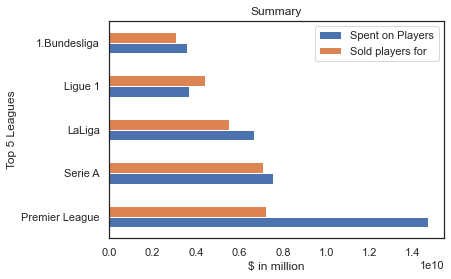

In [162]:
teams = diff_table.reset_index()
teams.plot(x='index',y=['Spent on Players','Sold players for'],kind='barh')
plt.title('Summary')
plt.ylabel('Top 5 Leagues')
plt.xlabel('$ in million')
plt.show()

### Summary Statistics on the Five leagues above!
* These are far and away the 5 most popular leagues around the world.

In [194]:
for i in diff_table.index:
    print(i, '\n ',df.loc[df['League_to'] == i].describe().loc[['mean', 'min', 'max']])

Premier League 
             Age  Market_value  Transfer_fee  Tranfer_value_ratio
mean  24.51672  9.777824e+06  1.170016e+07             2.510126
min   16.00000  5.000000e+04  9.500000e+05             0.256000
max   35.00000  7.000000e+07  1.050000e+08           118.000000
Serie A 
              Age  Market_value  Transfer_fee  Tranfer_value_ratio
mean  24.347767  8.858748e+06  1.019651e+07             2.001615
min   16.000000  5.000000e+04  9.000000e+05             0.160000
max   35.000000  1.000000e+08  1.170000e+08            60.000000
LaLiga 
             Age  Market_value  Transfer_fee  Tranfer_value_ratio
mean  24.39619  1.209199e+07  1.272450e+07             1.341230
min   17.00000  6.000000e+05  9.500000e+05             0.229167
max   34.00000  9.000000e+07  1.250000e+08            11.666667
Ligue 1 
              Age  Market_value  Transfer_fee  Tranfer_value_ratio
mean  23.889169  9.033272e+06  9.276373e+06             1.812901
min   16.000000  1.500000e+05  1.000000e+06     